# 0. Mount google drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


langkah pertama yaitu membuat penyimpanan pada google drive saya bisa dideteksi oleh google colab, ini demi memudahkan pengeksekusian code-code dibawah.

# 1. Collect data from Kaggle *with* API

kaggle merupakan sebuah platform yang biasa kita gunakan untuk mengambil contoh datasets. kaggle menyediakan sebuah API agar bisa mengambil datasetnya secara langsung. ini akan sangat menguntungkan apabila kita menggunakan google colab, karena ini bisa langsung memberikan kita akses kepada datasets nya tanpa harus mendownloadnya ke perangkat terlebih dahulu terlebih lagi datasetnya akan tersimpan di penyimpanan google sehingga akan lebih meghemat penyimpanan kita


---


cara penggunaannya di google colab:


1. ke bagian account di website kaggle. disitu nanti akan ada option untuk mengg-generate new token, nah jika kita klik itu kita akan mendownload file `kaggle.json`, didalam file tsb akan ada token yang akan kita embed di google colab 
2. upload token tersebut ke google colab yang akan digunakan
3. buat folder yang bernama `.kaggle`
4. masukkan file `kaggle.json` tadi ke folder `.kaggle`
5. identifikasi file `kaggle.json` menggunakan command `chmod`
6. install kaggle API pada google colab nya

langkah-langkah diatas bisa dilihan pada code dibawah



#### Set Up to use Kaggle API

In [1]:
# Install the Kaggle API
!pip install -q kaggle

In [2]:
# Make a directory named “.kaggle”
!mkdir -p ~/.kaggle

In [3]:
# Copy the “kaggle.json” into this new directory
!cp /content/drive/MyDrive/Datasets/kaggle.json ~/.kaggle/ 

In [4]:
# Allocate the required permission for this file
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
# Check the directory
!ls -a 

.  ..  .config	drive  sample_data


In [7]:
!ls ~/.kaggle/

kaggle.json


#### Import library

In [5]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import tensorflow as tf
from keras.preprocessing.image import img_to_array
from google.colab import drive

#### Download and Unzip datasets

setelah men set up kaggle API diatas kita bisa menggunakannya untuk mendownload dataset dari kaggle. caranya sangat mudah, kita tinggal mencari dataset yang ining kita pakai, lalu tekan tombol option pada dataset tersebut dan pilih opsi "Copy API command". setelah itu paste command nya ke cell di google colab dan tambahkan tanda seru (`!`) pada awal barisnya, setelah itu data akan terdownload dalam format `.zip`

In [6]:
!kaggle datasets download -d benhamner/nips-papers

100% 141M/141M [00:01<00:00, 115MB/s]
100% 141M/141M [00:01<00:00, 127MB/s]


untuk mengekstrak data dari format  `.zip` kita tinggal menggunakan command berikut :

In [7]:
!unzip -q nips-papers.zip -d .

#### Read the data

In [8]:
data = pd.read_csv("papers.csv")

In [9]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7241 non-null   int64 
 1   year        7241 non-null   int64 
 2   title       7241 non-null   object
 3   event_type  2422 non-null   object
 4   pdf_name    7241 non-null   object
 5   abstract    7241 non-null   object
 6   paper_text  7241 non-null   object
dtypes: int64(2), object(5)
memory usage: 396.1+ KB


,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


# 2. Collect data from device

untuk menguplaod file dari device, pertama-tama import package `files` dari `google.colab`. lalu gunakan method `.upload()` untuk bisa mengupload data dari device kita.

In [10]:
from google.colab import files
uploaded = files.upload()

Saving musicnet_metadata.csv to musicnet_metadata.csv


hasil upload dari method `.upload()` bukan merupakan file maka kita akan membacanya menggunakan `.BytesIO()` dari package `io`. setelah itu maka data siap digunakan

In [11]:
import io
data1 = pd.read_csv(io.BytesIO(uploaded['musicnet_metadata.csv']))
data1.head()

,id,composer,composition,movement,ensemble,source,transcriber,catalog_name,seconds
0,1727,Schubert,Piano Quintet in A major,2. Andante,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,447
1,1728,Schubert,Piano Quintet in A major,3. Scherzo: Presto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,251
2,1729,Schubert,Piano Quintet in A major,4. Andantino - Allegretto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,444
3,1730,Schubert,Piano Quintet in A major,5. Allegro giusto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,368
4,1733,Schubert,Piano Sonata in A major,2. Andantino,Solo Piano,Museopen,Segundo G. Yogore,D959,546


# 3. Colect data from URL

collect data dari url bisa langsung asalkan url yang dipakai langsung mengarah ke file dataset.

In [12]:
data2 = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/shopping_data_missingvalue.csv")
data2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39.0
1,2,Male,NaN,15.0,81.0
2,3,Female,20.0,NaN,6.0
3,4,Female,23.0,16.0,77.0
4,5,Female,31.0,17.0,NaN


# 4. Colect data from JSON

salah sateu metode pengambilan data dari JSON adalah menggunakan packgae `json` 

In [13]:
import json

f = open('/content/drive/MyDrive/Datasets/iris.json')
data3 = json.load(f)

In [14]:
data3

[{'petalLength': 1.4,
  'petalWidth': 0.2,
  'sepalLength': 5.1,
  'sepalWidth': 3.5,
  'species': 'setosa'},
 {'petalLength': 1.4,
  'petalWidth': 0.2,
  'sepalLength': 4.9,
  'sepalWidth': 3.0,
  'species': 'setosa'},
 {'petalLength': 1.3,
  'petalWidth': 0.2,
  'sepalLength': 4.7,
  'sepalWidth': 3.2,
  'species': 'setosa'},
 {'petalLength': 1.5,
  'petalWidth': 0.2,
  'sepalLength': 4.6,
  'sepalWidth': 3.1,
  'species': 'setosa'},
 {'petalLength': 1.4,
  'petalWidth': 0.2,
  'sepalLength': 5.0,
  'sepalWidth': 3.6,
  'species': 'setosa'},
 {'petalLength': 1.7,
  'petalWidth': 0.4,
  'sepalLength': 5.4,
  'sepalWidth': 3.9,
  'species': 'setosa'},
 {'petalLength': 1.4,
  'petalWidth': 0.3,
  'sepalLength': 4.6,
  'sepalWidth': 3.4,
  'species': 'setosa'},
 {'petalLength': 1.5,
  'petalWidth': 0.2,
  'sepalLength': 5.0,
  'sepalWidth': 3.4,
  'species': 'setosa'},
 {'petalLength': 1.4,
  'petalWidth': 0.2,
  'sepalLength': 4.4,
  'sepalWidth': 2.9,
  'species': 'setosa'},
 {'petalLe

metode lainnya kita bisa menggunakan package `pandas`

In [15]:
data3_pandas = pd.read_json('/content/drive/MyDrive/Datasets/iris.json')
data3_pandas.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


perbedaan anatara kedua method adalah hasil dari pengambilannya. ini nanti dipakai sesuai kebutuhan, apakah kita membutuhkan datasets dengan forman `json` atau `dataframe`

# 5. Colect data from unidentified package

maksud dari unidentified format ini adalah file yang berformat `.sav`,`spss`, dan lain-lain

In [17]:
! pip install -q pyreadstat

     |████████████████████████████████| 2.5 MB 30.8 MB/s 


In [18]:
import pyreadstat

In [21]:
df_employe, meta = pyreadstat.read_sav('/content/drive/MyDrive/Datasets/Employee data.sav') # all data_type is numeric
# df_titanic = pyreadstat.read_sav('titanic_model.sav')
df_employe.head()

,id,gender,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
0,1.0,m,15.0,3.0,57000.0,27000.0,98.0,144.0,0.0
1,2.0,m,16.0,1.0,40200.0,18750.0,98.0,36.0,0.0
2,3.0,f,12.0,1.0,21450.0,12000.0,98.0,381.0,0.0
3,4.0,f,8.0,1.0,21900.0,13200.0,98.0,190.0,0.0
4,5.0,m,15.0,1.0,45000.0,21000.0,98.0,138.0,0.0


namun untuk kita juga bisa menggunakan package `pandas` untuk membuka file `.sav`

In [ ]:
df_employe2 = pd.read_spss('/content/drive/MyDrive/Datasets/Employee data.sav') # pandas convert the data_type to object
df_employe2.head()

,id,gender,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
0,1.0,Male,15,Manager,57000.0,27000.0,98.0,144,No
1,2.0,Male,16,Clerical,40200.0,18750.0,98.0,36,No
2,3.0,Female,12,Clerical,21450.0,12000.0,98.0,381,No
3,4.0,Female,8,Clerical,21900.0,13200.0,98.0,190,No
4,5.0,Male,15,Clerical,45000.0,21000.0,98.0,138,No


This is called label encoding

# 6. Colect data from unstructured dataset such as picture

In [ ]:
path = os.listdir("/content/drive/MyDrive/Datasets/best-artwork/images/Leonardo_da_Vinci")

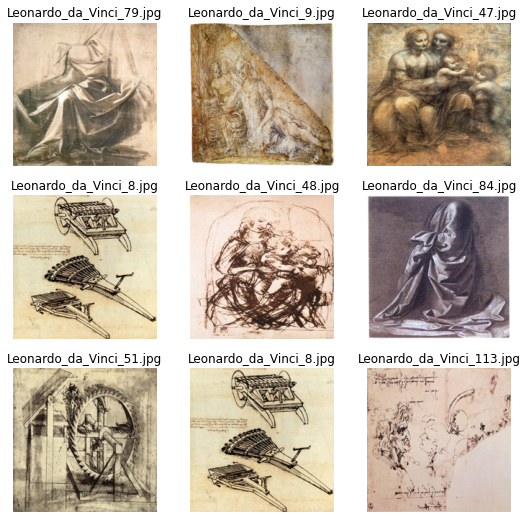

In [ ]:
import PIL

# These two variables are "the parameter" of this cell
w = 3
h = 3

# This function uses the open, resize and array function we have seen before 
load_img = lambda filename: np.array(PIL.Image.open(f"/content/drive/MyDrive/Datasets/best-artwork/images/Leonardo_da_Vinci/{filename}").resize((200, 200)))
_, axes_list = plt.subplots(h, w, figsize=(3*w, 3*h)) # define a grid of (w, h)


for axes in axes_list:
  for ax in axes:
    ax.axis('off')
    img = np.random.choice(path) # take a random train filename (like asdfjoi.jpg)
    ax.imshow(load_img(img)) # load and show
    ax.set_title(img)

# EXTRA - Download data from kaggle and put it in Drive

## Warning: execute this code only once 
if this code execute more than once, it will download the same datasets to drive. this gonna take off your storage

In [ ]:
# download dataset from kaggle and put in folder
!kaggle datasets download -d ikarus777/best-artworks-of-all-time -p /content/drive/MyDrive/Datasets/best-artwork(delete_this_to_execute)

100% 2.29G/2.29G [00:34<00:00, 84.3MB/s]
100% 2.29G/2.29G [00:35<00:00, 69.1MB/s]


In [ ]:
# Unzip it
os.chdir('/content/drive/MyDrive/Datasets/best-artwork')
!unzip -q best-artworks-of-all-time.zip -d .